# Assignment 1: Introduction to Deep Learning

## Task 1: Data dimensionality, distance-based classifier

In [30]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import random

#### Part 1

In [31]:
#import the training data and the associated labels/targets

train = np.genfromtxt('/Users/louis/Dropbox/Private_7aler/Louis/University Material/Leiden University/Introduction to Deep Learning/Assignments/Assignment1/train_in.csv', delimiter = ',')
train_labels = np.genfromtxt('/Users/louis/Dropbox/Private_7aler/Louis/University Material/Leiden University/Introduction to Deep Learning/Assignments/Assignment1/train_out.csv', delimiter = ',')

In [32]:
#compute the center of each cloud Cd

cd = np.zeros((10, 256))   # this array will include the center of each cloud
for j in range(10):
    i =  np.where(train_labels == j)
    mean = train[i].sum(axis = 0) / len(i[0])
    cd[j] = mean

In [33]:
#compute the distance matrix

dist = np.zeros((10, 10))   #  this will be the distance matrix
for i in range(10):
    for j in range(10):
        dist[i, j] = np.linalg.norm(cd[i] - cd[j])    #computes the distance between all clouds

In [34]:
print('Distance matrix: ')
print(dist)

Distance matrix: 
[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9.21195402
  10.8882374   0.          8.4677853   5.

In [35]:
#look for the clouds that closest to each other --> these will be digits that are difficult to seperate 

temp = np.copy(dist)   # just a temporary copy of the distance matrix
a = np.where(temp == 0) # indices of diagonal elements
temp[a] += 100
print(np.where(temp == np.amin(temp)))

(array([7, 9]), array([9, 7]))


One can conclude that the digits 7 and 9 will be very challenging to distinguish

#### Part 2

* PCA Analysis

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components = 2, svd_solver='full')
X2D = pca.fit_transform(train)   # gets the two principal component vectors of the training data
print(X2D)

[[ 4.81139495 -5.65778076]
 [ 6.61990392 -1.02500886]
 [ 1.03275595  2.20302847]
 ...
 [-3.76263552  5.4292544 ]
 [-3.75140916  2.30098398]
 [-0.05341531  4.41827087]]


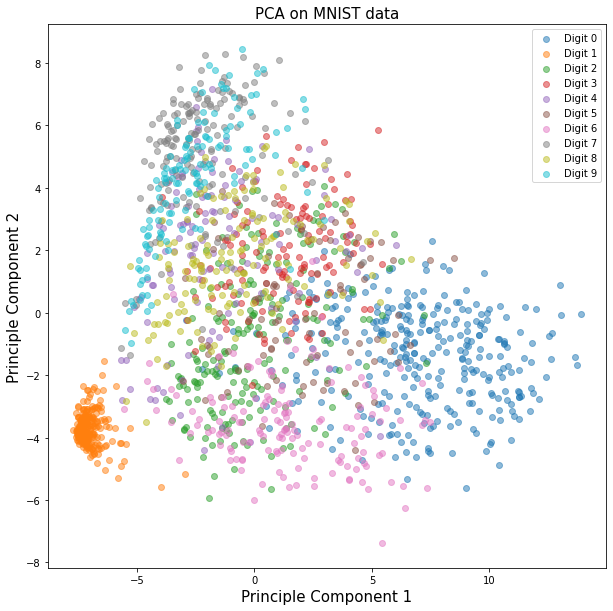

In [38]:
#visualize the training data using PCA

plt.figure(figsize= (10, 10))
for j in range(10):
    i = np.where(train_labels == j)
    plt.scatter(X2D[i, 0], X2D[i, 1], alpha = 0.5, label = 'Digit '+ str(j))
#plt.scatter(pca.components_[0], pca.components_[1], s = 1)
plt.plot()
plt.xlabel('Principle Component 1', fontsize = 15)
plt.ylabel('Principle Component 2', fontsize = 15)
plt.title('PCA on MNIST data', fontsize = 15)
plt.legend()
plt.show()

* LLE Analysis

In [39]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [40]:
lle = LLE(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(train)
print(X_reduced)   #the transformed training data using LLE analysis

[[ 0.01985936 -0.01980211]
 [-0.00122143 -0.0078278 ]
 [-0.0209035   0.00315759]
 ...
 [-0.04456421  0.00016221]
 [-0.03937408  0.00196821]
 [-0.00520704  0.01016132]]


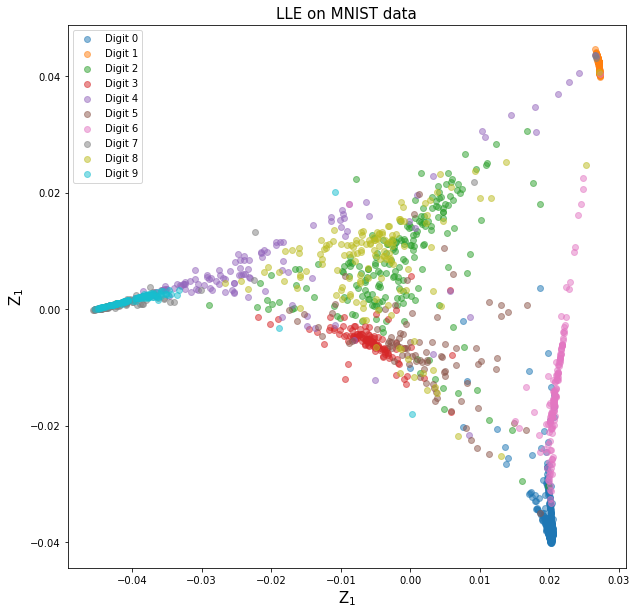

In [41]:
#visualize the training data using LLE

plt.figure(figsize= (10, 10))
for j in range(10):
    i = np.where(train_labels == j)
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], alpha = 0.5, label = 'Digit '+ str(j))

plt.plot()
plt.xlabel(r'Z$_1$', fontsize = 15)
plt.ylabel(r'Z$_1$', fontsize = 15)
plt.title('LLE on MNIST data', fontsize = 15)
plt.legend()
plt.show()

* t-SNE

In [42]:
from sklearn.manifold import TSNE

In [43]:
X_embedded = TSNE(n_components=2).fit_transform(train)
print(X_embedded) #the transformed training data using t-SNE analysis

[[ 44.179855   -3.305044 ]
 [ 13.392809   37.59647  ]
 [-30.32962   -19.148039 ]
 ...
 [-42.910614    1.5634788]
 [-36.086533   -8.914042 ]
 [-14.248799   14.177311 ]]


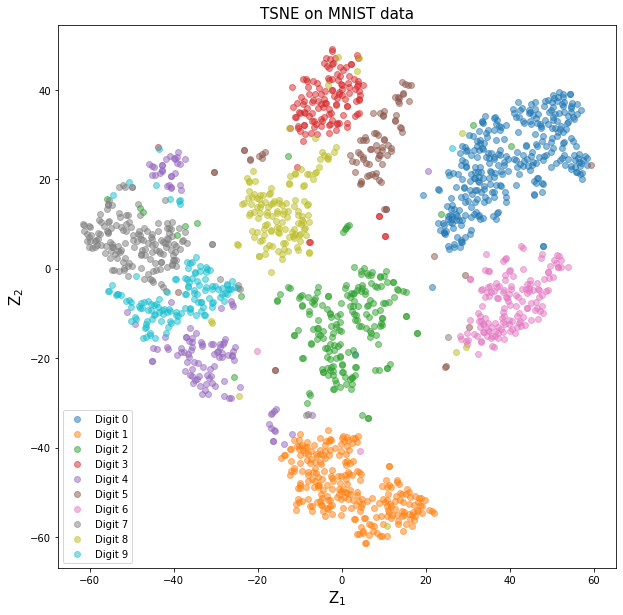

In [44]:
#visualize the training data using t-SNE

plt.figure(figsize= (10, 10))
for j in range(10):
    i = np.where(train_labels == j)
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], alpha = 0.5, label = 'Digit '+ str(j))

plt.plot()
plt.xlabel(r'Z$_1$', fontsize = 15)
plt.ylabel(r'Z$_2$', fontsize = 15)
plt.title('TSNE on MNIST data', fontsize = 15)
plt.legend()
plt.show()

#### Part 3

In [45]:
#import the test data and the associated labels/targets

test = np.genfromtxt('/Users/louis/Dropbox/Private_7aler/Louis/University Material/Leiden University/Introduction to Deep Learning/Assignments/Assignment1/test_in.csv', delimiter = ',')
test_labels = np.genfromtxt('/Users/louis/Dropbox/Private_7aler/Louis/University Material/Leiden University/Introduction to Deep Learning/Assignments/Assignment1/test_out.csv', delimiter = ',')

In [46]:
#assess the accuracy of the distance based classifier on both the training and test set

delta_train = np.zeros((len(train), 10))    #will include the distances of all the training digits to all the clouds
delta_test = np.zeros((len(test), 10))      #will include the distances of all the test digits to all the clouds
for i in range(10):                         #in the loop we compute these distances
    d = np.linalg.norm(cd[i] - train, axis = 1)
    delta_train[:, i] = d
    d = np.linalg.norm(cd[i] - test, axis = 1)
    delta_test[:, i] = d
    
predictions_train = []      #this list will include the predictions on the training data 
predictions_test = []       #this list will include the predictions on the test data 
for d in delta_train:
    predictions_train.append(np.argmin(d))     #the cloud to which the digit-vector has the minimal distance is the prediction
for d in delta_test:
    predictions_test.append(np.argmin(d))


#compute the accuracy now
x_train = train_labels - predictions_train     
n_train = np.count_nonzero(x_train == 0)
accuracy_train = n_train / len(train) * 100

x_test = test_labels - predictions_test
n_test = np.count_nonzero(x_test == 0)
accuracy_test = n_test / len(test) * 100



print('The accuracy on the training set is:', accuracy_train)
print('The accuracy on the test set is:', accuracy_test)

The accuracy on the training set is: 86.35032220269478
The accuracy on the test set is: 80.4


#### Part 4

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
#setup the KNN classifier and train in on the training data

knn_clf = KNeighborsClassifier()
knn_clf.fit(train, train_labels)
knn_predictions_train = knn_clf.predict(train)

In [49]:
#compute the accuracy of the KNN classifier on both the training and test set

x_train = train_labels - knn_predictions_train
n_train = np.count_nonzero(x_train == 0)
accuracy_train = n_train / len(train) * 100

knn_predictions_test = knn_clf.predict(test)
x_test = test_labels - knn_predictions_test
n_test = np.count_nonzero(x_test == 0)
accuracy_test = n_test / len(test) * 100

print('The accuracy on the training set is:', accuracy_train)
print('The accuracy on the test set is:', accuracy_test)

The accuracy on the training set is: 96.60222612770943
The accuracy on the test set is: 90.8


In [50]:
#compute the confusion matrices now for the naive classifier and KNN classifier

from sklearn.metrics import confusion_matrix

c_train = confusion_matrix(train_labels, predictions_train) 
c_test = confusion_matrix(test_labels, predictions_test) 
knn_c_train = confusion_matrix(train_labels, knn_predictions_train) 
knn_c_test = confusion_matrix(test_labels, knn_predictions_test) 
print('Confusion Matrix of training set using the simple distance-based classifier:')
print(c_train)
print('===========================================')
print('Confusion Matrix of test set using the simple distance-based classifier:')
print(c_test)
print('===========================================')
print('Confusion Matrix of training set using the KNN classifier:')
print(knn_c_train)
print('===========================================')
print('Confusion Matrix of test set using the KNN classifier:')
print(knn_c_test)

Confusion Matrix of training set using the simple distance-based classifier:
[[271   0   0   0   2   4  36   0   6   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  3   0 167   9   9   1   3   4   6   0]
 [  0   0   2 120   1   3   0   1   3   1]
 [  0   8   1   0  95   0   3   0   0  15]
 [  3   0   2   3   4  67   3   1   2   3]
 [ 10   4   5   0   2   0 129   0   1   0]
 [  0   4   0   0   2   2   0 140   1  17]
 [  1   2   1  10   2   3   1   0 121   3]
 [  0   3   0   1  10   0   0   6   0 112]]
Confusion Matrix of test set using the simple distance-based classifier:
[[178   0   3   2   4   2  23   1  10   1]
 [  0 120   0   0   0   0   1   0   0   0]
 [  2   0  69   6   8   1   0   2  13   0]
 [  3   0   3  61   1   8   0   0   1   2]
 [  1   3   3   0  69   0   1   1   0   8]
 [  3   0   0   6   3  38   1   0   0   4]
 [  7   0   2   0   2   1  78   0   0   0]
 [  0   2   1   0   5   0   0  50   0   6]
 [  3   2   0   6   3   3   0   0  73   2]
 [  0   5   0   0   8   0   0   

In [51]:
#example of how you can compute the prediction performance on each digit (from 0-9)
#here we look at the predictions from the simple distance-based classifier on the training set

for i in range(10):
    diag = c_train[i, i]
    s = c_train[i].sum()
    print('Percentage of correct predictions for the digit ' + str(i) + ': ' + 
          str(diag/ s * 100) + ' %')
    

Percentage of correct predictions for the digit 0: 84.95297805642633 %
Percentage of correct predictions for the digit 1: 100.0 %
Percentage of correct predictions for the digit 2: 82.67326732673267 %
Percentage of correct predictions for the digit 3: 91.6030534351145 %
Percentage of correct predictions for the digit 4: 77.8688524590164 %
Percentage of correct predictions for the digit 5: 76.13636363636364 %
Percentage of correct predictions for the digit 6: 85.43046357615894 %
Percentage of correct predictions for the digit 7: 84.33734939759037 %
Percentage of correct predictions for the digit 8: 84.02777777777779 %
Percentage of correct predictions for the digit 9: 84.84848484848484 %


## Task 2: Implement a multi-class perceptron algorithm

In [52]:
N0 = 256    #input layer size
N1 = 10     #output layer size

#initialize random weights between -1 and 1: array dimensions N1xN0
w = random.uniform(low=-1,high=+1,size=(N1,N0))

#initialize biases to 1: N1 vector
b = np.ones(N1)


In [53]:
#training the single layer perceptron - we will continue the training until no more training samples are missclassified during one epoch

streak = 0   #streak keeps track of the number of consecutive right predictions during one epoch
precision = []  #list keeps track on the prediction accuracy for each epoch 

while streak < len(train):   #learning algorithm begins here
    streak = 0
    for y_in, label in zip(train, train_labels):  #new training epoch begins
        z = np.dot(w,y_in) + b
        y_out = np.argmax(z)                  #node that has the maximum activation
        if y_out != label:
            i_up = np.where(z > z[int(label)])   #index of weights that were activated too much
            w[i_up] -=  y_in           #update weights that were activated too much
            w[int(label)] += y_in      #update weight that was activated too little
        else:
            streak += 1
    precision.append(streak / len(train) * 100)
        

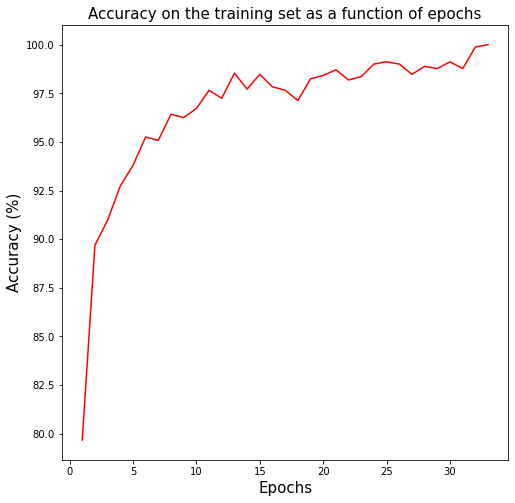

In [54]:
#plot the accuracy evolution of the single layer perceptron

plt.figure(figsize= (8, 8))
plt.plot(np.arange(1, len(precision) + 1, 1), precision, c = 'red')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy (%)', fontsize = 15)
plt.title('Accuracy on the training set as a function of epochs', fontsize = 15)
#plt.savefig('Single_Layer_perceptron')
plt.show()

In [55]:
#assess the performance of the perceptron on the training and test set 

predictions_train = [] #this list will include the predictions on the training data 
for i in range(len(train)):
    y_in = train[i]
    z = np.dot(w,y_in) + b 
    y_out = np.argmax(z)
    predictions_train.append(y_out)

#compute the accuracy on the training data 
x_train = predictions_train - train_labels
n_train = np.count_nonzero(x_train == 0)
accuracy_train = n_train / len(train) * 100

print('The accuracy on the training set is:', accuracy_train)

predictions_test = [] #this list will include the predictions on the test data 
for i in range(len(test)):
    y_in = test[i]
    z = np.dot(w,y_in)+b 
    y_out = np.argmax(z)
    predictions_test.append(y_out)

#compute the accuracy on the test data 
x_test = predictions_test - test_labels
n_test = np.count_nonzero(x_test == 0)
accuracy_test = n_test / len(test) * 100

print('The accuracy on the test set is:', accuracy_test)

The accuracy on the training set is: 100.0
The accuracy on the test set is: 87.5


In [56]:
#compute the confusion matrices of both the test and training set predictions 

c_train = confusion_matrix(train_labels, predictions_train) 
c_test = confusion_matrix(test_labels, predictions_test) 

print('Confusion Matrix of training set using the single layer perceptron:')
print(c_train)
print('Confusion Matrix of test set using the single layer perceptron:')
print('===========================================')
print(c_test)

Confusion Matrix of training set using the single layer perceptron:
[[319   0   0   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0]
 [  0   0   0 131   0   0   0   0   0   0]
 [  0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 132]]
Confusion Matrix of test set using the single layer perceptron:
[[211   0   1   2   3   1   4   0   1   1]
 [  0 117   1   0   1   0   2   0   0   0]
 [  3   0  82   3   2   1   1   3   6   0]
 [  3   0   1  62   0   5   0   2   4   2]
 [  5   2   3   0  67   2   0   1   1   5]
 [  1   0   1   2   1  45   2   1   1   1]
 [  1   0   2   0   1   3  83   0   0   0]
 [  0   1   1   0   4   0   0  55   0   3]
 [  2   0   2   3   2   3   0   2  75   3]
 [  0   3   1   0   1   0   0   4   1  78]]


In [57]:
#example of how you can compute the prediction performance on each digit (from 0-9)
#here we look at the predictions from the single layer perceptron on the test set

for i in range(10):
    diag = c_test[i, i]
    s = c_test[i].sum()
    print('Percentage of correct predictions for the digit ' + str(i) + ': ' + 
          str(diag/ s * 100) + ' %')
    

Percentage of correct predictions for the digit 0: 94.19642857142857 %
Percentage of correct predictions for the digit 1: 96.69421487603306 %
Percentage of correct predictions for the digit 2: 81.1881188118812 %
Percentage of correct predictions for the digit 3: 78.48101265822784 %
Percentage of correct predictions for the digit 4: 77.90697674418605 %
Percentage of correct predictions for the digit 5: 81.81818181818183 %
Percentage of correct predictions for the digit 6: 92.22222222222223 %
Percentage of correct predictions for the digit 7: 85.9375 %
Percentage of correct predictions for the digit 8: 81.52173913043478 %
Percentage of correct predictions for the digit 9: 88.63636363636364 %


## Task 3: Implement the XOR network and the Gradient Descent Algorithm

In [58]:
#defining all the necessary functions that are used in the neural network




#function that initialized the weights and biases
def generate_weights(): 
    N0 = 2 #input layer size
    N1 = 2 #hidden layer size
    N2 = 1 #output layer size

    #weights and biases
    #from input layer to hidden layer:
    w1 = np.random.uniform(low = -1, high = +1, size = (N1, N0)) # random weights: N1xN0
    b1 = np.ones(N1) # biases: N1 vector

    
    #weights+biases from hidden layer to output layer:
    #random weights
    w2 = np.random.uniform(low = -1, high = +1, size = (N1, N2)) # random weights: N1xN2
    b2 = np.ones(N2) # biases: N2 vector
    
    return w1, w2, b1, b2
    
    
    
    


#computes the activation function - possible activation functions are sigmoid, tanh and relu
def act_function(z, name):
    if name == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif name == 'tanh':
        return np.tanh(z)
    elif name == 'relu':
        out = np.zeros(z.shape)
        i = np.where(z > 0)
        out[i] = z[i]
        return out

    
    
    
    
#computes the derivative of the activation function
def act_function_der(y, name):
    if name == 'sigmoid':
        return y*(1.0 - y)
    elif name == 'tanh':
        return 1 - y**2
    elif name == 'relu':
        out = np.zeros(y.shape)
        i = np.where(y > 0)
        out[i] = 1
        return out
        

        
        
        
#simulates the xor network, i.e use this function to do a prediction
def predicting(y_in):
    global w1, w2, b1, b2, act_name
    
    z = np.dot(y_in, w1) + b1     
    y = act_function(z, act_name) #output of hidden nodes
    z = np.dot(y, w2) + b2
    y_out = act_function(z, act_name) #output of output node
    return y_out 





#computes the mean squared error between the prediction and the target value
def mse(y_in, d):     #d is the target output 
    y_out = predicting(y_in)    #get a prediction using the input y_in
    return 0.5 * (y_out - d)**2   #definition of mse





#computes the gradient of mse and computes the necessary changes of the weights and biases
#for backpropagation
def grdmse(y_in, d):   #d is the target output
    global w1, w2, b1, b2, act_name
    
    y_h = act_function(np.dot(y_in, w1) + b1, act_name)  #output of hidden nodes
    y_out = act_function(np.dot(y_h, w2) + b2, act_name) #output of output node
    
    #backpropagation now begins here
    y_out_err= y_out - d     #error in the output
    y_out_delta = np.multiply(y_out_err, act_function_der(y_out, act_name))
    
    y_h_err = np.dot(y_out_delta, w2.T)
    y_h_delta = np.multiply(y_h_err, act_function_der(y_h, act_name))
    
    
    dw1 = np.dot(y_in.T, y_h_delta)   #change for the input to hidden layer weigths
    dw2 = np.dot(y_h.T, y_out_delta)  #change for the hidden to output layer weigths
    
    db1 = y_h_delta.sum(0)       #change in the biases for the hidden nodes
    db2 = y_out_delta.sum(0)     #change in the bias for the output node
    
    return dw1, dw2, db1, db2





#updates the weigths and biases using gradient descent 
def gda(y_in, d, eta):   #eta is the learning rate
    global w1, w2, b1, b2
    dw1, dw2, db1, db2 = grdmse(y_in, d)   #changes in the weights and biases
    
    #update the weights and biases
    w1 -= eta * dw1
    w2 -= eta * dw2
    b1 -= eta * db1
    b2 -= eta * db2
    

In [59]:
act_name = input("Enter the activation function, options are: sigmoid, tanh, relu -> ")

Enter the activation function, options are: sigmoid, tanh, relu -> sigmoid


In [60]:
inputs=np.array([[0, 0], [0, 1], [1, 0], [1, 1] ])   #training set
outputs=np.array([ [0], [1], [1], [0] ])     #targets of training set 

w1, w2, b1, b2 = generate_weights()   #initialize the weights
#act_name = 'sigmoid'
#act_name = 'tanh'
#act_name = 'relu'

epochs = 5000   #for how many epochs you want to train the network
eta = 1        #learning rate
mean_error = []   #this list keeps track of the mean_error during training 
right = 0         #keeps track of number of right predictions
wrong = 0         #keeps track of number of wrong predictions

#train the network
for i in range(epochs):
    error = mse(inputs, outputs).sum() / 4
    mean_error.append(error)
    gda(inputs, outputs, 1)
    y_out = predicting(inputs)

    y_out_rounded = np.around(y_out, decimals=0)
    wrong += (abs(y_out_rounded - outputs)).sum()
    right += 4 - (abs(y_out_rounded - outputs)).sum()

print('Predictions:', predicting(inputs))
print('Percentage of correct predictions throughout training: ' + str(right / (right + wrong) * 100) + ' %')
print('Percentage of wrong predictions throughout training: ' + str(wrong / (right + wrong) * 100) + ' %')

Predictions: [[0.02206252]
 [0.97528999]
 [0.97523203]
 [0.01993652]]
Percentage of correct predictions throughout training: 98.105 %
Percentage of wrong predictions throughout training: 1.8950000000000002 %


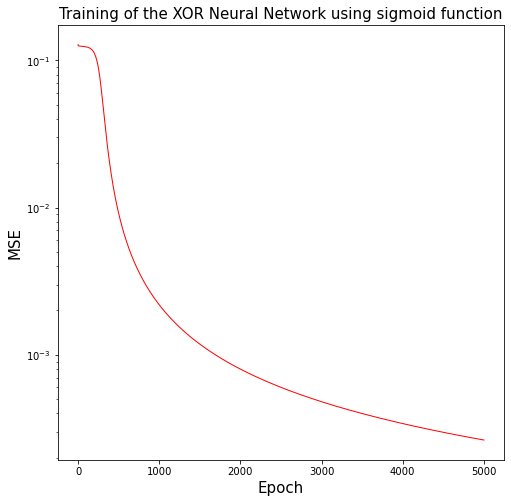

In [61]:
#plot a figure of the MSE as a function of epochs

plt.figure(figsize= (8, 8))
plt.plot(np.linspace(0, epochs, epochs), mean_error, linewidth = 1.0, c = 'red')
plt.xlabel('Epoch', size = 15)
plt.ylabel('MSE', size = 15)
plt.title('Training of the XOR Neural Network using sigmoid function', size = 15)
plt.yscale('log')
#plt.savefig('xor_sigmoid')
plt.show()

#### We consider now the 'Lazy training' approach

In [62]:
N0 = 2 # input layer size
N1 = 2 # hidden layer size
N2 = 1 # output layer size

inputs=np.array([[0, 0], [0, 1], [1, 0], [1, 1] ])   
outputs=np.array([ [0], [1], [1], [0] ])
act_name = 'sigmoid'

count = 0   #keeps track of number of reininitializations of weights were required
right = 0
while right < 4:
    right = 0 
    w1, w2, b1, b2 = generate_weights() 
    y_out = predicting(inputs)
    y_out_rounded = np.around(y_out, decimals=0)
    right = 4 - (abs(y_out_rounded - outputs)).sum()
    count += 1  
    
print('Predictions:', predicting(inputs))
print('Number of iterations required to find a good set of weights:', count)

Predictions: [[0.49730377]
 [0.50542322]
 [0.50055862]
 [0.49455331]]
Number of iterations required to find a good set of weights: 113737
